<a href="https://colab.research.google.com/github/Xarisviero/datastories_for_emme/blob/main/Homework_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Δημιουργία  emolex για sentiment analysis**



In [170]:
#!python -m spacy download el_core_news_sm

In [171]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [173]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [277]:
emolex_df = pd.read_csv(filepath)
emolex_df.head(3)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
emolex_df.tail(3)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [280]:
import spacy

In [281]:
nlp = spacy.load('el_core_news_sm')

Στην συνέχεια θα διαβάσουμε τα άρθρα













In [282]:
kathimerini_df=pd.read_csv("/content/gdrive/MyDrive/kathimerini.gr-MAY23.csv")

In [283]:
len(kathimerini_df)

3694

In [284]:
kathimerini_df.head(3)

,site,url,date,section,title,author,text
0,kathimerini.gr,https://www.kathimerini.gr/world/562396441/pri...,2023-05-01,ΚΟΣΜΟΣ,Πριγκόζιν: Η ουκρανική αντεπίθεση ίσως να είνα...,Newsroom,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,kathimerini.gr,https://www.kathimerini.gr/society/562396447/p...,2023-05-01,ΚΟΙΝΩΝΙΑ,Πρωτομαγιά με βροχές και καταιγίδες σε όλη τη ...,Newsroom,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2,kathimerini.gr,https://www.kathimerini.gr/society/562396426/c...,2023-05-01,ΚΟΙΝΩΝΙΑ,"Χωρίς μετρό, ηλεκτρικό και τραμ την Πρωτομαγιά...",Newsroom,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...


**Σορτάρουμε τα columns σε date και text**

In [285]:
short_kathimerini_df = kathimerini_df[['date','text' ]]
short_kathimerini_df.head()

,date,text
0,2023-05-01,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,2023-05-01,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2,2023-05-01,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...
3,2023-05-01,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
4,2023-05-01,Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...


**Μετατρέπουμε το date σε datetime**

In [286]:
short_kathimerini_df.dtypes

date    object
text    object
dtype: object

In [287]:
short_kathimerini_df['date']=pd.to_datetime(short_kathimerini_df['date'],format='%Y-%m-%d' )

<ipython-input-287-ef111f916059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_kathimerini_df['date']=pd.to_datetime(short_kathimerini_df['date'],format='%Y-%m-%d' )


In [288]:
short_kathimerini_df.dtypes

date    datetime64[ns]
text            object
dtype: object

In [289]:
short_kathimerini_df.head(3)

,date,text
0,2023-05-01,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,2023-05-01,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2,2023-05-01,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...


In [290]:
short_kathimerini_df

,date,text
0,2023-05-01,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,2023-05-01,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2,2023-05-01,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...
3,2023-05-01,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
4,2023-05-01,Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...
...,...,...
3689,2023-05-31,"«Με τον πλέον επίσημο τρόπο, ο κ. Μητσοτάκης, ..."
3690,2023-05-31,"Βρίζουν, κορνάρουν άσκοπα, τρέχουν – ενίοτε κα..."
3691,2023-05-31,"Η Ιαπωνία, ένα μικρό νησιωτικό έθνος στο ανατο..."
3692,2023-05-31,Από το Πέραμα Μυλοποτάμου στο Ρέθυμνο ξεκίνησε...


**Φτιάχνουμε έναν vectorizer από τις λέξεις του συναισθηματικού λεξικού**

In [291]:
emolex_df['word'].head(5)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
Name: word, dtype: object

In [292]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

**Μετράμε πόσες φορές εμφανίζονται οι λέξεις του συναισθηματικού λεξικού στα κείμενα των άρθρων**

In [293]:
matrix = vec.fit_transform(short_kathimerini_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
wordcount_df.shape

(3694, 13161)

**Φτιάχνουμε λίστες με τις λέξεις για θετικότητα/αρνητικότητα και για κάθε συναίσθημα**

In [295]:
emolex_df[emolex_df["Anger"]== 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [296]:
emolex_df[emolex_df.Positive == 1]['word']

0                       αφεση
8                        αμην
11                  αυγουστος
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
                 ...         
13109        ζωτικης σημασιας
13132              αδιαβροχος
13137            καλωσορισατε
13145      απροσδοκητα ευρημα
13158                νεοτερος
Name: word, Length: 2352, dtype: object

In [297]:
emolex_df[emolex_df.Negative == 1]['word']

6                    υδρα
9                  απατσι
17               γαιδαρος
20                γιαννης
27       δευτερα παρουσια
               ...       
13147             αλιμονο
13148       επιδεινωνεται
13152      κατειργασμενος
13155           κιτρινιζω
13156           ουρλιασμα
Name: word, Length: 3473, dtype: object

In [298]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

**Οι λίστες που φτιάξαμε είναι της μορφής:**

In [299]:
sadness_words

27           δευτερα παρουσια
28                   δευτερον
36                   εξαρτηση
62                 κορσικανος
69               λυρικη σκηνη
                 ...         
13123                ελλειπων
13129                 σπαταλω
13144    ανεξελεγκτη πυρκαγια
13147                 αλιμονο
13148           επιδεινωνεται
Name: word, Length: 1328, dtype: object

**Οι λέξεις/φράσεις της κάθε λίστας είναι ονόματα στηλών στο wordcount_df**

In [300]:
wordcount_df.tail(10)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
3684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3690,0,0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Στην συνέχεια θα πάρουμε το άθροισμα των εμφανίσεων όλων των λέξεων/φράσεων ενός συναισθήματος σε κάθε άρθρο**

In [301]:
wordcount_df[trust_words].sum(axis=1)

0        5
1        3
2        6
3       11
4       35
        ..
3689     1
3690     2
3691    11
3692    12
3693     6
Length: 3694, dtype: int64

**Έπειτα θα δημιουργήσουμε στήλες συναισθημάτων**

In [302]:
short_kathimerini_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_kathimerini_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_kathimerini_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_kathimerini_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_kathimerini_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_kathimerini_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_kathimerini_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_kathimerini_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_kathimerini_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_kathimerini_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-302-8037ce7511cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_kathimerini_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-302-8037ce7511cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_kathimerini_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-302-8037ce7511cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [303]:
short_kathimerini_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-05-01,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...,6,3,2,4,4,5,3,6,16,8
1,2023-05-01,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...,2,7,3,2,0,3,4,2,4,0
2,2023-05-01,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...,4,6,0,4,0,6,4,7,14,8
3,2023-05-01,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...,6,11,5,3,4,11,11,3,6,4
4,2023-05-01,Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...,7,41,15,8,12,35,16,15,45,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3689,2023-05-31,"«Με τον πλέον επίσημο τρόπο, ο κ. Μητσοτάκης, ...",1,1,0,0,0,1,2,0,2,2
3690,2023-05-31,"Βρίζουν, κορνάρουν άσκοπα, τρέχουν – ενίοτε κα...",10,10,0,8,4,2,3,6,16,10
3691,2023-05-31,"Η Ιαπωνία, ένα μικρό νησιωτικό έθνος στο ανατο...",4,22,6,6,6,11,9,4,10,6
3692,2023-05-31,Από το Πέραμα Μυλοποτάμου στο Ρέθυμνο ξεκίνησε...,1,17,5,4,4,12,3,3,7,6


In [304]:
short_kathimerini_df.reset_index(inplace=True)
short_kathimerini_df.set_index('date', inplace=True)
short_kathimerini_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-05-01,0,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...,6,3,2,4,4,5,3,6,16,8
2023-05-01,1,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...,2,7,3,2,0,3,4,2,4,0
2023-05-01,2,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...,4,6,0,4,0,6,4,7,14,8
2023-05-01,3,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...,6,11,5,3,4,11,11,3,6,4
2023-05-01,4,Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...,7,41,15,8,12,35,16,15,45,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,3689,"«Με τον πλέον επίσημο τρόπο, ο κ. Μητσοτάκης, ...",1,1,0,0,0,1,2,0,2,2
2023-05-31,3690,"Βρίζουν, κορνάρουν άσκοπα, τρέχουν – ενίοτε κα...",10,10,0,8,4,2,3,6,16,10
2023-05-31,3691,"Η Ιαπωνία, ένα μικρό νησιωτικό έθνος στο ανατο...",4,22,6,6,6,11,9,4,10,6


**Τώρα θα μετρήσουμε τον μ.ο. του αριθμού των χαρακτήρων των λέξεων ανά ημέρα**

<Axes: ylabel='date'>

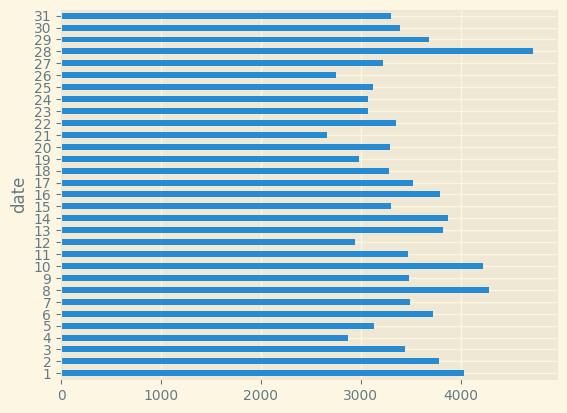

In [305]:
short_kathimerini_df['text'].str.len().groupby(by=short_kathimerini_df.index.day).mean().plot(kind='barh')

<Axes: xlabel='date'>

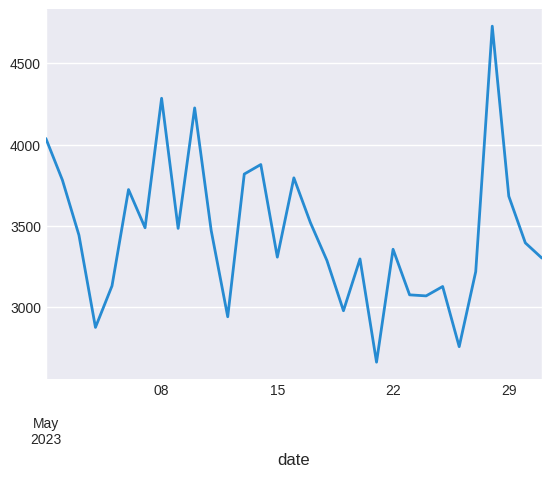

In [223]:
short_kathimerini_df['text'].str.len().resample('d').mean().plot()

**Μετράμε το πλήθος των άρθρων ανά ημέρα**

<Axes: ylabel='date'>

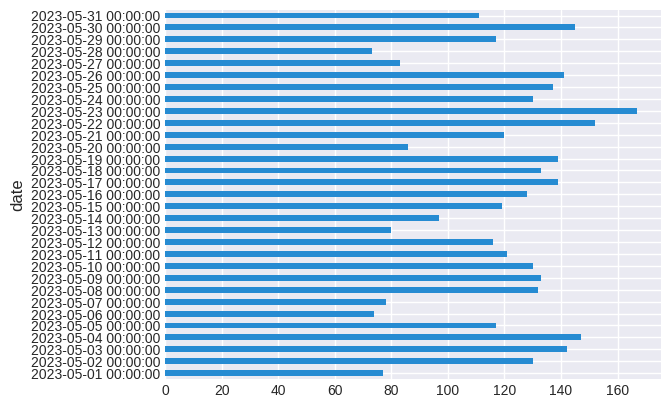

In [232]:
short_kathimerini_df['text'].resample('D').count().plot(kind='barh')

**Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά ημέρα**

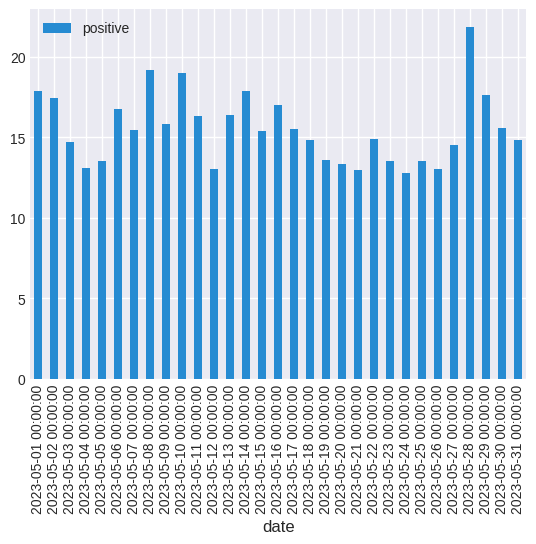

In [250]:
short_kathimerini_df['positive'].resample('D').mean().plot(kind='bar').legend()

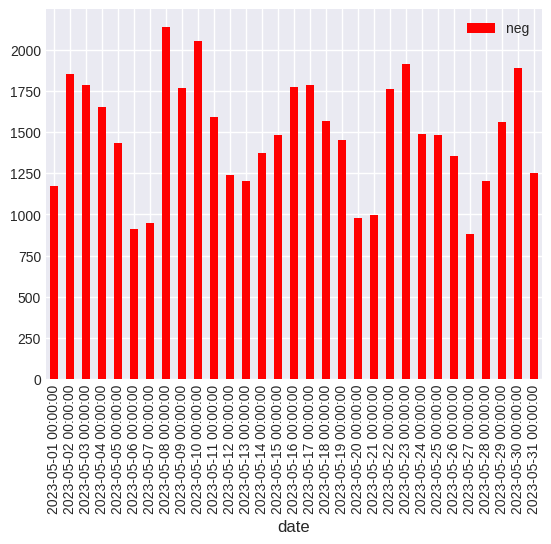

In [252]:
short_kathimerini_df['negative'].resample('D').sum().plot(kind='bar',color = 'red',label = 'neg').legend()

**Τώρα θα εμφανίσουμε τα linecharts της χαράς και του φόβου**  

<Axes: xlabel='date'>

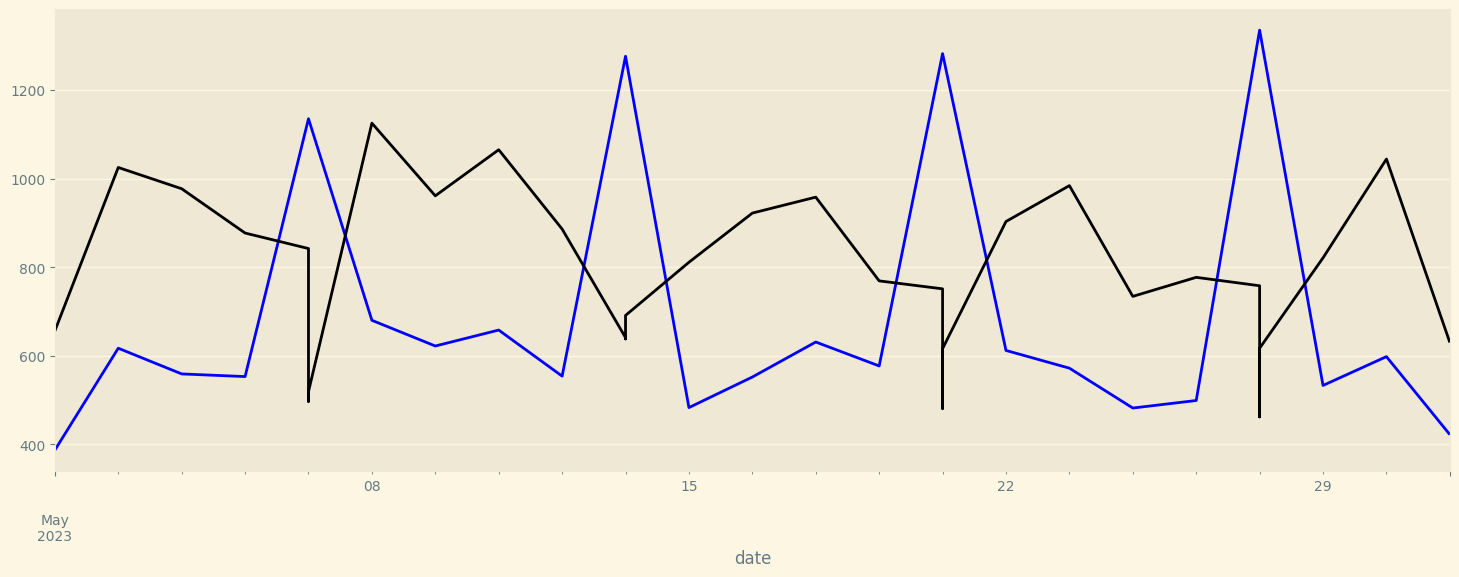

In [306]:
ax=short_kathimerini_df['joy'].resample('B').sum().plot(figsize=(18,6), color = 'blue')
short_kathimerini_df['fear'].resample('D').sum().plot(figsize=(18,6),ax=ax, color = 'black')

**Τώρα θα εμφανίσουμε τα linecharts για τα θετικά,τα αρνητικά και τα αηδιαστικά συναισθήματα με διαφορετικό γράφημα**

In [307]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [308]:
plt.style.use('Solarize_Light2')

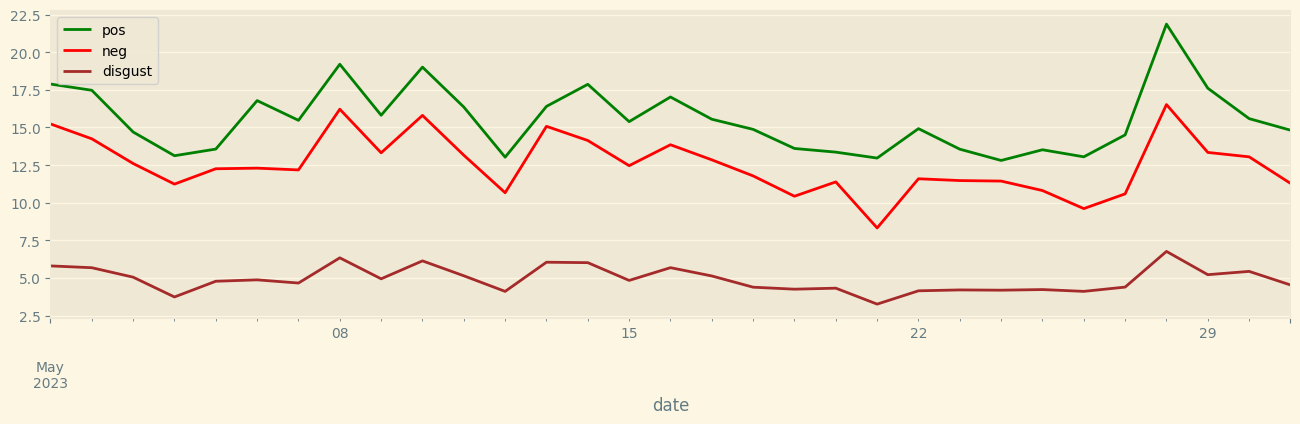

In [313]:
ax=short_kathimerini_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_kathimerini_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_kathimerini_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()

**Συγκριση των διαφορών π.χ. θετικότητας/αρνητικότητας.**

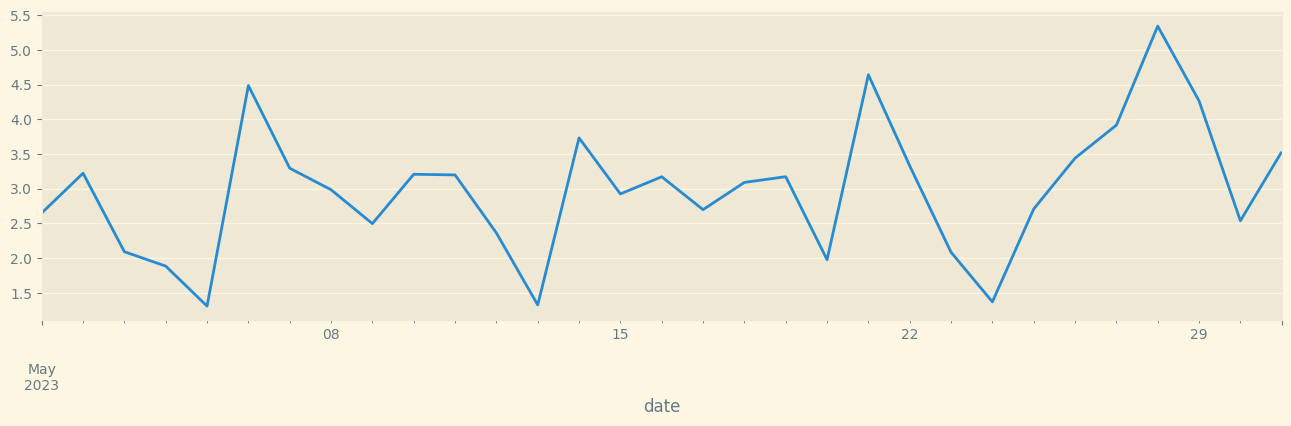

In [310]:
short_kathimerini_df['pos/neg'] = short_kathimerini_df['positive'] - short_kathimerini_df['negative']
ax=short_kathimerini_df['pos/neg'].resample('d').mean().plot( figsize=(16,4))

In [240]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

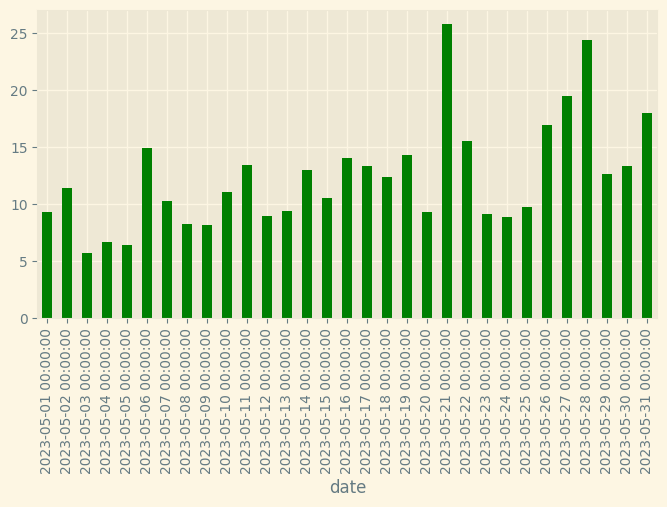

In [311]:
short_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'] = short_kathimerini_df.positive*100//short_kathimerini_df[['positive','negative']].sum(
        axis=1) - short_kathimerini_df.negative*100//short_kathimerini_df[['positive','negative']].sum(axis=1)

short_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

**Ας εντοπίσουμε το άρθρο με τη μεγαλύτερη θετικότητα και το άρθρο με τη μεγαλύτερη αρνητικότητα**

In [312]:
short_kathimerini_df[(short_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'] == short_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'] == short_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2023-05-01,20,2,0,100.0
2023-05-01,79,5,0,100.0
2023-05-02,163,1,0,100.0
2023-05-02,205,1,0,100.0
2023-05-03,233,1,0,100.0
...,...,...,...,...
2023-05-30,3510,3,0,100.0
2023-05-31,3582,5,0,100.0
2023-05-31,3608,2,0,100.0
